<a href="https://colab.research.google.com/github/mustakimce21004/dataPreporcessing/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load dataset
df = pd.read_csv('dataset.csv')
print("Original Dataset (first 10 rows):")
print(df.head(10))

# Convert Age and Salary to numeric (coerce errors to NaN)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Detect missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Handle missing data (fill with mean) safely
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

print("\nAfter Handling Missing Values:")
print(df.isnull().sum())

# Normalize numerical data
scaler = MinMaxScaler()
df[['Age_norm', 'Salary_norm']] = scaler.fit_transform(df[['Age', 'Salary']])

# Standardize numerical data
standard_scaler = StandardScaler()
df[['Age_std', 'Salary_std']] = standard_scaler.fit_transform(df[['Age', 'Salary']])

# Display preprocessed data
print("\nPreprocessed Dataset (first 10 rows):")
print(df.head(10))

# Save preprocessed dataset
df.to_csv('preprocessed_dataset.csv', index=False)
print("\n✅ Preprocessed dataset saved as preprocessed_dataset.csv")


Original Dataset (first 10 rows):
    country  Age Salary purchased
0    France   44  72000        No
1     Spain   27  48000       Yes
2   Germany   38    NaN       Yes
3     Spain  NaN  52000        No
4     Italy   35  58000       Yes
5    France   48  65000        No
6   Germany   29  42000       Yes
7  Portugal   41  71000        No
8     Italy   33  50000       Yes
9     Spain   36  60000        No

Missing Values in Each Column:
country       0
Age          14
Salary       45
purchased     0
dtype: int64

After Handling Missing Values:
country      0
Age          0
Salary       0
purchased    0
dtype: int64

Preprocessed Dataset (first 10 rows):
    country        Age        Salary purchased  Age_norm  Salary_norm  \
0    France  44.000000  72000.000000        No  0.809524     0.937500   
1     Spain  27.000000  48000.000000       Yes  0.000000     0.187500   
2   Germany  38.000000  61183.760684       Yes  0.523810     0.599493   
3     Spain  37.911824  52000.000000        No 

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Load the dataset again to ensure we have the original 'purchased' column
df = pd.read_csv('dataset.csv')

# Convert Age and Salary to numeric (coerce errors to NaN) and fill missing values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())


# Handle 'purchased' column using Label Encoding
label_encoder = LabelEncoder()
df['purchased_encoded'] = label_encoder.fit_transform(df['purchased'])

# Handle missing values in other columns if any remain (e.g., country)
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype in ['int64', 'float64']:
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing Values Before ColumnTransformer:")
print(df.isnull().sum())

# Normalize numerical data
scaler = MinMaxScaler()
df[['Age_norm', 'Salary_norm']] = scaler.fit_transform(df[['Age', 'Salary']])

# Standardize numerical data
standard_scaler = StandardScaler()
df[['Age_std', 'Salary_std']] = standard_scaler.fit_transform(df[['Age', 'Salary']])

# Handle 'country' column using One-Hot Encoding
# Use ColumnTransformer to apply OneHotEncoder to the 'country' column
# We will apply it to the DataFrame that now includes the 'purchased_encoded' column
# We will drop the original 'purchased' column before applying ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['country'])], remainder='passthrough')

# Define the columns to be transformed and passed through
columns_to_transform = ['country']
# Ensure only relevant columns are passed through, excluding original 'country' and 'purchased' and 'purchased_encoded'
columns_to_passthrough = [col for col in df.columns if col not in ['country', 'purchased', 'purchased_encoded']]

# Apply the transformation
# We drop the original 'country' and 'purchased' columns before applying ColumnTransformer
df_transformed_array = ct.fit_transform(df[columns_to_transform + columns_to_passthrough])

# To convert the result back to a pandas DataFrame with proper column names:
# Get the column names after one-hot encoding
onehot_columns = ct.named_transformers_['encoder'].get_feature_names_out(['country'])

# Create the final list of column names for the transformed array
transformed_columns = list(onehot_columns) + columns_to_passthrough


# Create a DataFrame from the transformed array
df_processed = pd.DataFrame(df_transformed_array, columns=transformed_columns)

# Add the 'purchased_encoded' column back to the processed DataFrame
df_processed['purchased_encoded'] = df['purchased_encoded']

# Update the original df variable to the processed DataFrame
df = df_processed

# Display the resulting DataFrame
print("\nDataFrame after encoding 'purchased' and 'country', and scaling:")
print(df.head(10)) # Display first 10 rows of the DataFrame


Missing Values Before ColumnTransformer:
country              0
Age                  0
Salary               0
purchased            0
purchased_encoded    0
dtype: int64

DataFrame after encoding 'purchased' and 'country', and scaling:
   country_France  country_Germany  country_Italy  country_Portugal  \
0             1.0              0.0            0.0               0.0   
1             0.0              0.0            0.0               0.0   
2             0.0              1.0            0.0               0.0   
3             0.0              0.0            0.0               0.0   
4             0.0              0.0            1.0               0.0   
5             1.0              0.0            0.0               0.0   
6             0.0              1.0            0.0               0.0   
7             0.0              0.0            0.0               1.0   
8             0.0              0.0            1.0               0.0   
9             0.0              0.0            0.0     

In [ ]:
# Load the original dataset again for comparison
df_original = pd.read_csv('dataset.csv')

# Convert Age and Salary to numeric (coerce errors to NaN)
df_original['Age'] = pd.to_numeric(df_original['Age'], errors='coerce')
df_original['Salary'] = pd.to_numeric(df_original['Salary'], errors='coerce')

# Dataset after dropping rows with missing values
df_dropped = df_original.dropna()
print("Dataset after dropping rows with missing values (first 10 rows):")
print(df_dropped.head(10))
print(f"\nNumber of rows after dropping NaNs: {len(df_dropped)}")


# Dataset after filling missing values (as done in the previous cell)
df_filled = df_original.copy() # Create a copy to avoid modifying df_original in place
df_filled['Age'] = df_filled['Age'].fillna(df_filled['Age'].mean())
df_filled['Salary'] = df_filled['Salary'].fillna(df_filled['Salary'].mean())

print("\nDataset after filling missing values (first 10 rows):")
print(df_filled.head(10))
print(f"\nNumber of rows after filling NaNs: {len(df_filled)}")

Dataset after dropping rows with missing values (first 10 rows):
     country   Age   Salary purchased
0     France  44.0  72000.0        No
1      Spain  27.0  48000.0       Yes
4      Italy  35.0  58000.0       Yes
5     France  48.0  65000.0        No
6    Germany  29.0  42000.0       Yes
7   Portugal  41.0  71000.0        No
8      Italy  33.0  50000.0       Yes
9      Spain  36.0  60000.0        No
10    France  39.0  63000.0       Yes
11   Germany  31.0  47000.0        No

Number of rows after dropping NaNs: 457

Dataset after filling missing values (first 10 rows):
    country        Age        Salary purchased
0    France  44.000000  72000.000000        No
1     Spain  27.000000  48000.000000       Yes
2   Germany  38.000000  61183.760684       Yes
3     Spain  37.911824  52000.000000        No
4     Italy  35.000000  58000.000000       Yes
5    France  48.000000  65000.000000        No
6   Germany  29.000000  42000.000000       Yes
7  Portugal  41.000000  71000.000000        N

In [ ]:
# Explore one-hot encoded 'country' columns
print("Value counts for one-hot encoded country columns:")
# Iterate through the columns that start with 'country_' (excluding the original 'country' if it somehow remained)
for col in df.columns:
    if col.startswith('country_') and col != 'country':
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())

print("\n" + "="*30 + "\n")

# Explore 'purchased_encoded' column
print("Unique values and counts for 'purchased_encoded':")
print(df['purchased_encoded'].value_counts())

Value counts for one-hot encoded country columns:

Value counts for country_France:
country_France
0.0    411
1.0    102
Name: count, dtype: int64

Value counts for country_Germany:
country_Germany
0.0    411
1.0    102
Name: count, dtype: int64

Value counts for country_Italy:
country_Italy
0.0    411
1.0    102
Name: count, dtype: int64

Value counts for country_Portugal:
country_Portugal
0.0    412
1.0    101
Name: count, dtype: int64

Value counts for country_Spain:
country_Spain
0.0    410
1.0    103
Name: count, dtype: int64

Value counts for country_country:
country_country
0.0    510
1.0      3
Name: count, dtype: int64


Unique values and counts for 'purchased_encoded':
purchased_encoded
0    255
1    255
2      3
Name: count, dtype: int64


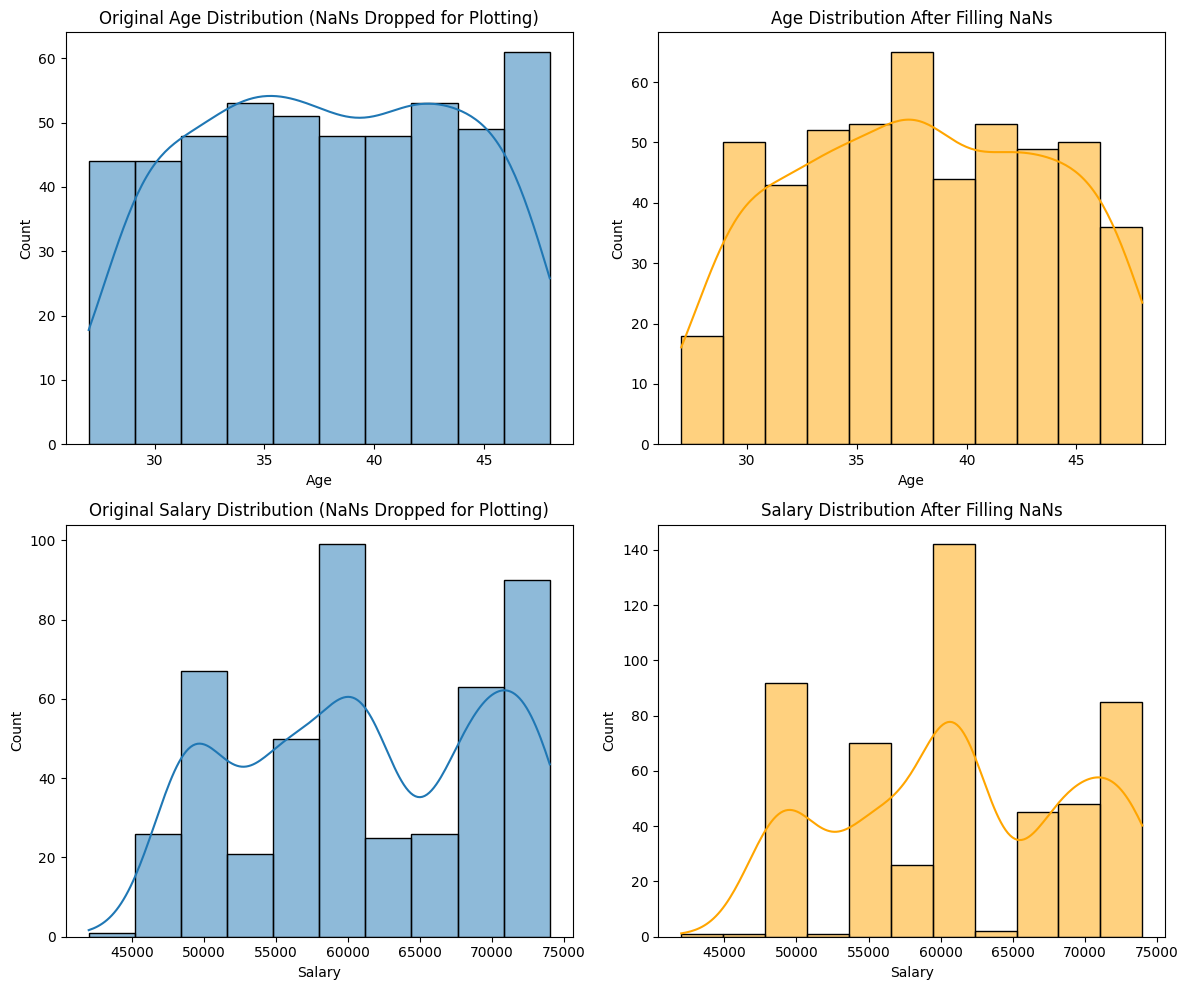

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_original and df_filled are available from previous cells
# If not, uncomment the following lines to load and fill the data:
# import pandas as pd
# df_original = pd.read_csv('dataset.csv')
# df_original['Age'] = pd.to_numeric(df_original['Age'], errors='coerce')
# df_original['Salary'] = pd.to_numeric(df_original['Salary'], errors='coerce')
# df_filled = df_original.copy()
# df_filled['Age'] = df_filled['Age'].fillna(df_filled['Age'].mean())
# df_filled['Salary'] = df_filled['Salary'].fillna(df_filled['Salary'].mean())


# Visualize distributions of original and filled data
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df_original['Age'].dropna(), kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Age Distribution (NaNs Dropped for Plotting)')

sns.histplot(df_filled['Age'], kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Age Distribution After Filling NaNs')

sns.histplot(df_original['Salary'].dropna(), kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Original Salary Distribution (NaNs Dropped for Plotting)')

sns.histplot(df_filled['Salary'], kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Salary Distribution After Filling NaNs')


plt.tight_layout()
plt.show()

# You can add visualizations for scaled data in a separate cell if needed
# import matplotlib.pyplot as plt
# import seaborn as sns

# fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# sns.histplot(df['Age_norm'], kde=True, ax=axes[0])
# axes[0].set_title('Normalized Age Distribution')
# sns.histplot(df['Salary_norm'], kde=True, ax=axes[1])
# axes[1].set_title('Normalized Salary Distribution')
# plt.tight_layout()
# plt.show()

# fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# sns.histplot(df['Age_std'], kde=True, ax=axes[0])
# axes[0].set_title('Standardized Age Distribution')
# sns.histplot(df['Salary_std'], kde=True, ax=axes[1])
# axes[1].set_title('Standardized Salary Distribution')
# plt.tight_layout()
# plt.show()